In [5]:
from nearline_helpers import *
import json

In [6]:
runs = [
    # 306,
    305
]
t = r.TChain('tree')
for run in runs:
    t.Add(f"../bin/*run*{run}*root")
t.GetEntries()

446206

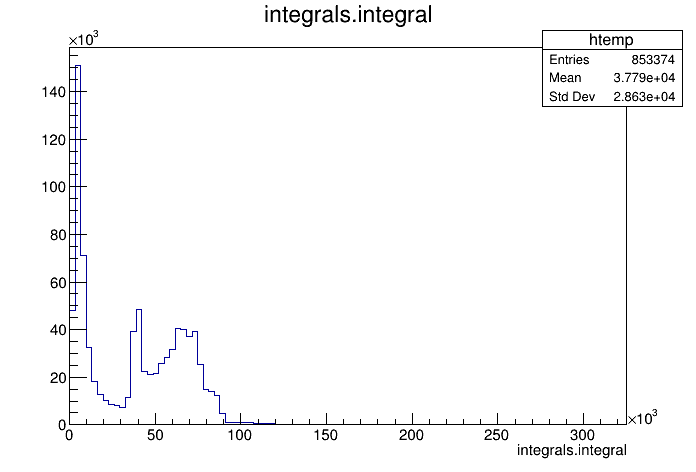

In [7]:
c = r.TCanvas()
t.Draw("integrals.integral","","colz")
c.Draw()

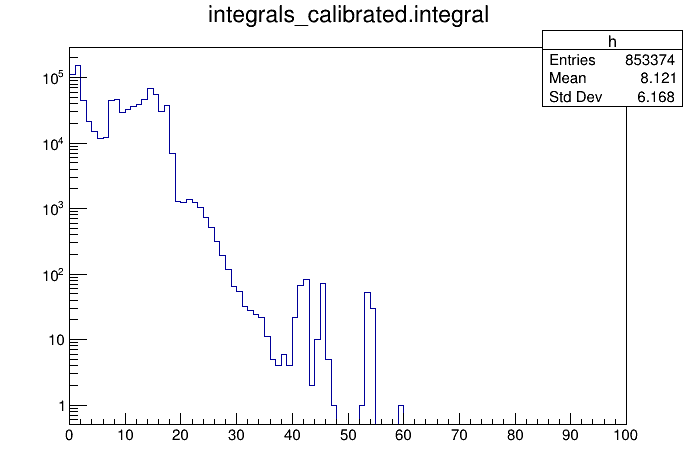

In [8]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integral>>h(100,0,100)","","")
c.SetLogy()
c.Draw()

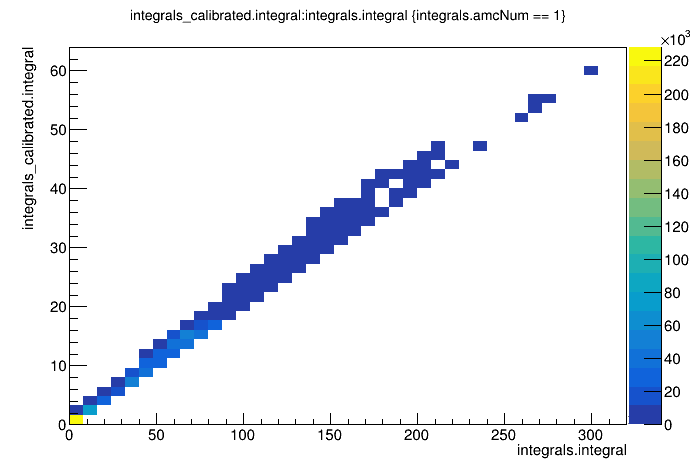

In [9]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integral:integrals.integral","integrals.amcNum == 1","colz")
# c.SetLogy()
c.Draw()

In [10]:
# cut = "amcNum == 1 && @integrals.size() == 1 && integrals.amcNum == 1"
cut = "integrals.amcNum == 1"

hr = r.TH2D("h", "; Pulse Integral [arb. u.]; Channel Number", 1000,0,200,5,0,5)
hr2 = r.TH3D("h2", "; Pulse Integral [arb. u.]; Amplitude [ADC Counts/4.096 -> mV]; Channel Number", 1000,0,400, 1000,0,1000,5,0,5)
t.Draw("integrals_calibrated.channelTag:integrals_calibrated.integral>>h", cut,"goff")
t.Draw("integrals_calibrated.channelTag:integrals_calibrated.amplitude/4.096:integrals_calibrated.integral>>h2", cut,"goff")
h = uproot.from_pyroot(hr).to_hist()
h2 = uproot.from_pyroot(hr2).to_hist()
h

Hist(
  Regular(1000, 0, 200, name=<TString 'xaxis' at 0x7f3789830650>, label=<TString ' Pulse Integral [arb. u.]' at 0x7f3789830550>),
  Regular(5, 0, 5, name=<TString 'yaxis' at 0x7f3789830450>, label=<TString ' Channel Number' at 0x7f37898305d0>),
  storage=Double()) # Sum: 853364.0

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


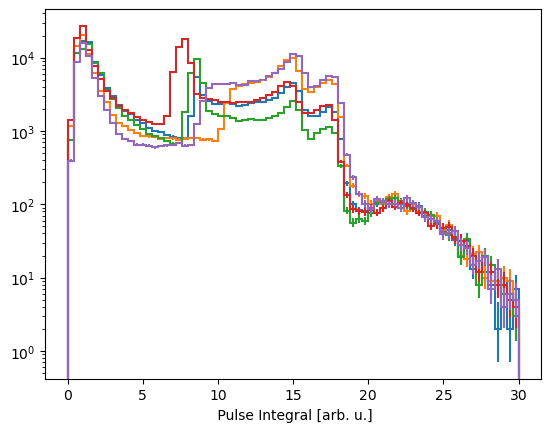

In [11]:
h2[:30j,::sum,:].stack(1).plot()
plt.yscale("log")
plt.show()

In [12]:
n = t.Draw("Entry$", "integrals_calibrated.integral > 1000","goff")
n

2

In [13]:
for i in range(n):
    t.GetEntry(int(t.GetV1()[i]))
    print([x.integral for x in t.integrals_calibrated])


[13.65936832960208, 6.9905689672329325, 2396.199999999997]
[2.920013266848168, 20.757260902952503, 22.434434704203742, 3453.5999999999985]


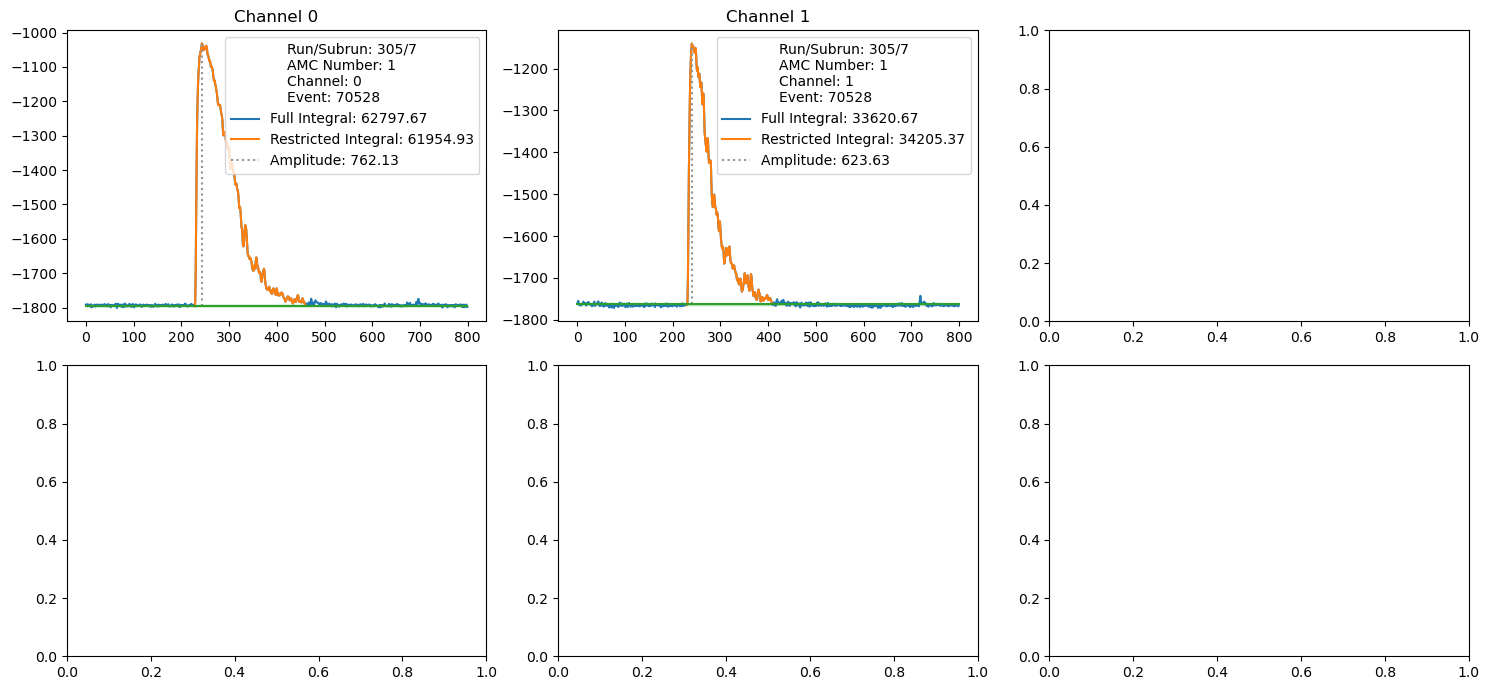

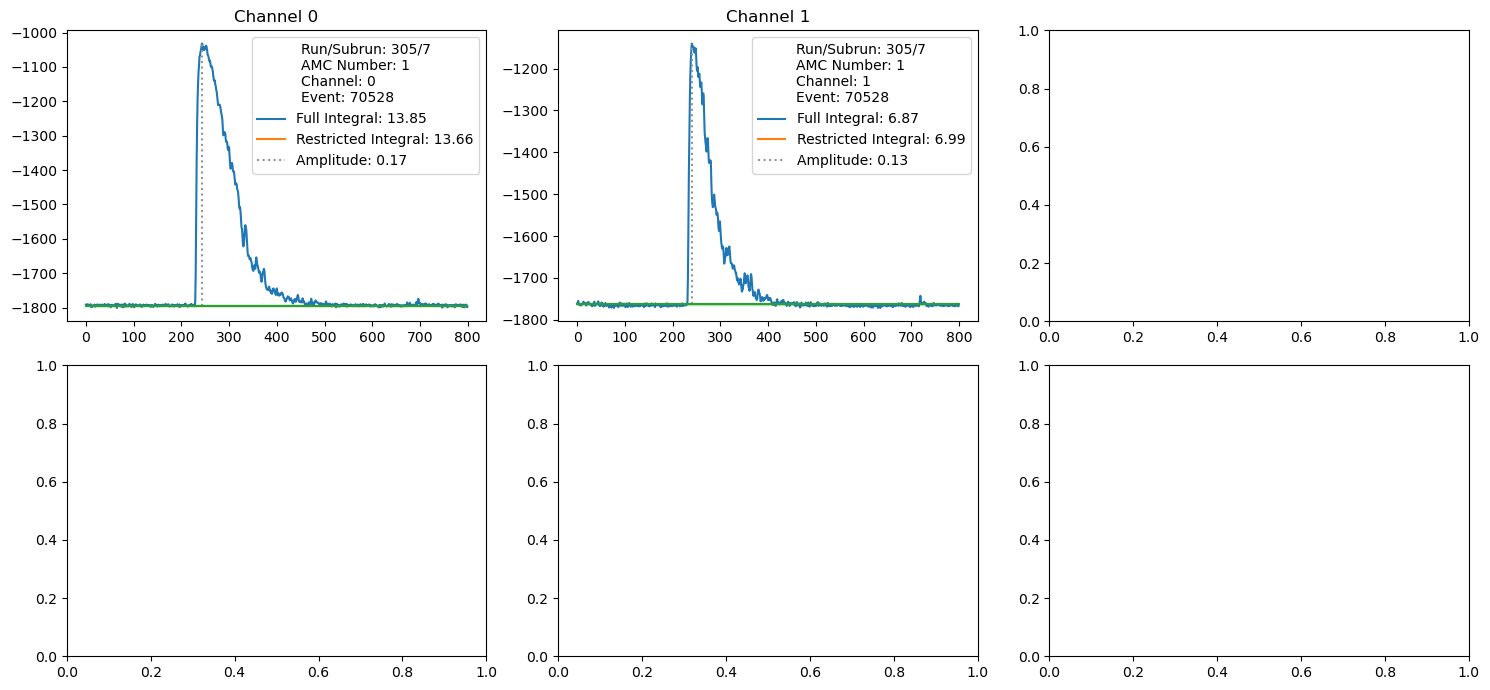

In [14]:
for i in range(n):
    t.GetEntry(int(t.GetV1()[i]))
    fig,ax = plt.subplots(2,3,figsize=(15,7))
    for wfi in t.integrals:
        if wfi.amcNum > 1:
            continue
        channel = wfi.channelTag
        axi = ax.ravel()[channel]
        plot_integral(wfi, ax=axi)
        axi.set_title(f'Channel {channel}')
    plt.tight_layout()
    plt.show()

    fig,ax = plt.subplots(2,3,figsize=(15,7))
    for wfi in t.integrals_calibrated:
        if wfi.amcNum > 1:
            continue
        channel = wfi.channelTag
        axi = ax.ravel()[channel]
        plot_integral(wfi, ax=axi)
        axi.set_title(f'Channel {channel}')
    plt.tight_layout()
    plt.show()
    break

In [ ]:
omar_constants =  [1, 1.07157, 1.0397, 1.08122, 0.949767]
with open('./cosmic_calib.json', 'r') as fin:
    calib = json.load(fin)

In [ ]:
my_constants = [0 for i in range(5)]
for x in calib['energy_calibration']:
    if x['amcSlotNum'] == 1 and x['crateNum'] == 0:
        my_constants[x['channelNum']] = x['energy_calibration']
my_constants

In [ ]:
ding = [my_constants[0]/x for x in my_constants]

In [ ]:
for i, xi in enumerate(ding):
    ratio = xi/omar_constants[i]
    print(f'Channel {i} -> {xi:.4f} | {omar_constants[i]:.4f} -> {ratio:.4f}')